In [2]:
import sys, time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_style('white')
palette = 'magma_r'
%matplotlib inline

# 2D Helmholtz equation

The Helmholtz equation is the eigenvalue problem for the Laplace operator. Recall the definition of the Laplace operator in 2D:

$$
\begin{align}
\nabla^2 u &= \frac{\delta^2 u}{\delta x^2} + \frac{\delta^2 u}{\delta y^2}
\end{align}
$$

And recall the definition of eigenvalues $\lambda$ and eigenvectors $\vec{v}$ for a linear transformation $A$:

$$
\begin{align}
A \vec{v} &= \lambda \vec{v}
\end{align}
$$

The Helmholtz equation defines an implicit function $u(x,y)$ that is an *eigenfunction* of the Laplace operator for the eigenvalue $-k^2$. Intuitively, $u$ is a function such that repeatedly applying the Laplace operator only scales the function by $-k^2$.

$$
\begin{align}
\nabla^2 u &= -k^2 u \\
\frac{\delta^2 u}{\delta x^2} + \frac{\delta^2 u}{\delta y^2} &= -k^2 u
\end{align}
$$

Note that, similar to the Laplace and Poisson equations, the Helmholtz equation is time-independent. It describes equilibrium states of a system.

Let's discretize the Helmholtz equation using finite differences.

$$
\begin{align}
\frac{u(x + \Delta x,y) - 2 u(x,y) + u(x - \Delta x,y)}{\Delta x^2} + \frac{u(x,y + \Delta y) - 2 u(x,y) + u(x,y - \Delta y)}{\Delta y^2} &= -k^2 u(x,y) \\
[u(x + \Delta x,y) - 2 u(x,y) + u(x - \Delta x,y)] \Delta y^2 + [u(x,y + \Delta y) - 2 u(x,y) + u(x,y - \Delta y) ] \Delta x^2  &= -k^2 u(x,y) \Delta x^2 \Delta y^2 \\
[u(x + \Delta x,y) + u(x - \Delta x,y)] \Delta y^2 + [u(x,y + \Delta y) + u(x,y - \Delta y) ] \Delta x^2  &= u(x,y) (2 \Delta x^2 + 2 \Delta y^2 -k^2 \Delta x^2 \Delta y^2) \\
\frac{[u(x + \Delta x,y) + u(x - \Delta x,y)] \Delta y^2 + [u(x,y + \Delta y) + u(x,y - \Delta y) ] \Delta x^2}{2 \Delta x^2 + 2 \Delta y^2 -k^2 \Delta x^2 \Delta y^2}  &= u(x,y)
\end{align}
$$

Then convert to the solver computation.

$$
\begin{align}
u_{n,i,j} &= \frac{[u_{n,i+1,j}  + u_{n,i-1,j}] \Delta y^2 + [u_{n,i,j+1} + u_{n,i,j-1} ] \Delta x^2}{2 \Delta x^2 + 2 \Delta y^2 - k^2 \Delta x^2 \Delta y^2} \\
\end{align}
$$

The intuition behind the Laplace operator is it it computes the average difference in values of a function at local spheres around each point from the value at the point. So in the Laplace equation, we are finding functions where the average difference between neighboring values is 0, i.e. the function has a smoothness quality. In the Helmholtz equation, we are finding functions where the average difference between neighboring values is some constant, i.e. there is a constant amount of "turbulence" in the values (is that the proper use of that term?).

<ipython-input-14-90f089fdd7fb>:24: RuntimeWarning: divide by zero encountered in true_divide
  p[0] = -1/(X**2 + Y**2)
<ipython-input-14-90f089fdd7fb>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)
<ipython-input-14-90f089fdd7fb>:37: RuntimeWarning: divide by zero encountered in true_divide
  p[n] = -1/(X**2 + Y**2)


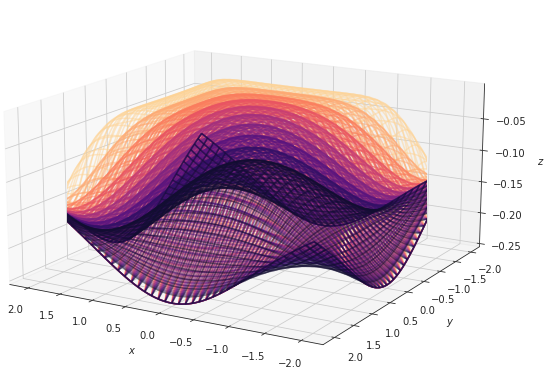

In [14]:
# 2D Helmholtz equation
n_x = 81
n_y = 81
n_t = 1001 # number of iterations

dx = 4 / (n_x - 1)
dy = 4 / (n_y - 1)
# no time resolution

k = 1

mod = 100

# color by time step
colors = iter(sns.color_palette(palette, n_t//mod))

# spatial grid points
x = np.linspace(0, (n_x-1)*dx, n_x) - 2
y = np.linspace(0, (n_y-1)*dy, n_y) - 2
X, Y = np.meshgrid(x, y)

# initial/boundary conditions
p = np.zeros((n_t, n_x, n_y))
p[0] = -1/(X**2 + Y**2)
p[0,1:-1,1:-1] = 0

fig = plt.figure(figsize=(15,5))
ax = Axes3D(fig)
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.5, 1.5, 1, 1]))
fig.add_axes(ax)

#surf = ax.plot_wireframe(X, Y, p[0].T, color=next(colors), alpha=1.0)

for n in range(1, n_t):
    
    # reset boundary conditions
    p[n] = -1/(X**2 + Y**2)

    p[n,1:-1,1:-1] = (
        dy**2 * (p[n-1,2:,1:-1] + p[n-1,:-2,1:-1]) +
        dx**2 * (p[n-1,1:-1,2:] + p[n-1,1:-1,:-2])
    ) / (2*(dx**2 + dy**2) - k**2 * dx**2 * dy**2)

    if n%mod == 0:
        surf = ax.plot_wireframe(X, Y, p[n].T, color=next(colors), alpha=0.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.view_init(15, 120)